# "Modularité - Gestion des bugs"

> "La modularité des programmes, la documentation et la gestion des bugs."

- toc : true
- categories : [Langage de programmation, Modularité]

## Introduction

Un programme, quel que soit le langage de programmation utilisé, c'est :
- de très nombreuses, plusieurs milliers, lignes de code;
- plusieurs fichiers et dossiers;
- écrit par plusieurs personnes (développeurs, graphistes, spécialistes);
- avoir recours à des programmes déjà existants;
- plusieurs versions au cours du développement (version de production et versions de développement);
- des bugs inconnus, non encore découverts.

Le développement d'un programme est un projet à long terme. Au fil du temps, selon l'intérêt qu'il suscite, celui-ci va grossir, se développer. Il arrive donc un moment ou l'organisation de ce projet doit être solide et clair pour que les développeurs s'y retrouvent, ne perdent pas leur temps à chercher qui fait quoi, ne pas recréer ce qui existe déjà, améliorer rapidement le code et corriger les bugs découverts.

La réussite d'un tel projet s'appuie sur des pratiques essentielles dont:
1. La modularité
2. La documentation
3. Les tests

## Modularité

L'intérêt d'utiliser la modularité se décline en plusieurs raisons:
- réutiliser des programmes ou des fonctions dans plusieurs programmes;
- simplifier l'écriture d'un programme en les rendant plus lisibles et courts;
- éviter de recréer des fonctions ou des programmes existants avec le risque de produire des erreurs (bugs);
- en cas de bug sur une fonction, on corrige le module sans avoir à corriger tous les programmes qui utilisent cette fonction.

En Python, un programme peut utiliser les fonctions d'un autre programme appelé alors **module** (ou librairie). Ce module contient des fonctions qui seront utilisées par d'autres programmes.

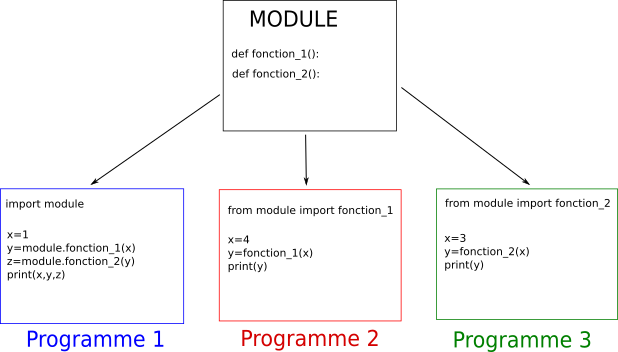

La syntaxe pour importer un module en Python est la suivante:
- `import module` ce qui implique de préfixer les fonctions du module par le nom du module;
- `from module import fonctions` qui permet d'appeler les fonctions sans préfixe;
- `import module as alias` qui permet d'employer un alias si le nom de module est trop long.

#### Remarque
Même s'il est possible d'importer les fonctions d'un module avec la syntaxe `from module import *`, celle-ci est fortement déconseillée pour éviter des erreurs. Le risque, en cas d'import de plusieurs modules, est d'avoir des fonctions qui ont le même nom et donc provoquer un conflit entre elles.

### Exercice

On utilisera l'éditeur **Thonny** pour cet exercice.
1. Créer deux fichiers, dans un même doissier, nommés *calcul.py* et *commerce.py*.
2. Le fichier *calcul.py* est un module contenant des fonctions de calculs.    
Créer la fonction **remise** acceptant en argument 2 nombres réels *x* et *y* et qui renvoie la valeur *x* diminuée de *y*%.
3. Le fichier *commerce.py* est un programme qui utilise les fonctions du **module** *calcul.py*. Ce programme doit calculer une remise de *n*% sur tous les prix contenus dans un **tuple**. 
Les valeurs remisées seront enregistrées dans une **liste**.      
Par exemple, pour une remise de 25 % sur les prix `(20,50,100)`, on obtient après exécution du programme la liste `[15.0, 37.5, 75.0]`.

---

### Le module est un programme

Les programmes doivent pouvoir s'exécuter sur une machine sans avoir à ouvrir l'éditeur ou l'interpréteur Python.

Par exemple, le programme *commerce.py* doit pouvoir être exécuté depuis une console en saisissant la commande `python commerce.py`.

Un module est appelé par les autres programmes, mais c'est aussi un programme qui doit pouvoir s'exécuter. 

Par exemple, en console, on doit pouvoir exécuter le module *calcul.py*.

#### Remarque

Il est fort probable que tout ne se passe pas comme attendu. On va donc commenter et examiner ce qui se passe ou pas.

### Exercice

1. Vérifiez que vos programmes s'exécutent en console.  
2. Ajouter dans le module *calcul.py* un appel de la fonction **remise** puis un affichage du résultat. Relancez le programme en console.
3. Exécutez à nouveau le programme *commerce.py*. Que remarquez-vous ?
---

On quitte la console et on poursuit avec l'éditeur Thonny. En Python, il existe une fonction, **locals**, qui renvoie un dictionnaire contenant les variables, les fonctions et les modules utilisés par le programme. 

Le dictionnaire affiché dépend du programme en cours d'exécution. Il faut donc être attentif au programme interprété.

La variable **\_\_name\_\_** contient la valeur **\_\_main\_\_** (principal en français). Elle renseigne l'interpréteur sur le programme en cours.

Lorsqu'un module est importé, celui-ci contient aussi une variable **\_\_name\_\_** dont la valeur est le nom du module. Cela va donc nous permettre de faire un test pour exécuter ou non un programme.

On donne le code d'un programme principal qui est exécuté en important un module.

```python
import module

if __name__ == '__main__':
    print("Le programme principal est exécuté.")
```

Le code du module importé est le suivant:

```python
if __name__ == '__main__':
    print("Le module est exécuté.")
```

#### Programme principal exécuté
Lorsque le programme principal est exécuté, le module est importé et la variale **module.\_\_name\_\_** a pour valeur le nom du module, donc différent de **\_\_main\_\_**. 

En conséquence l'affichage *Le module est exécuté.* ne se fait pas. 

La variable **\_\_name\_\_** du programme principal a pour valeur **\_\_main\_\_** donc l'affichage *Le programme principal est exécuté.* se réalise.

#### Module exécuté
Lorsque le module est exécuté en tant que programme, la variable **\_\_name\_\_** a pour valeur **\_\_main\_\_** et alors l'affichage *Le module est exécuté.* est réalisé.

### Exercice

Modifiez vos programmes *calcul.py* et *commerce.py*.

---

## Documentation

La documentation est essentielle pour le développeur lui-même et aussi pour toutes les personnes qui reprendront le code. Elle doit si possible:
- être claire, compréhensible et courte mais détaillée;
- expliquer ce que fait un programme, une fonction ou un objet;
- indiquer le rôle des variables, les paramètres d'une fonction, les attributs d'un objet;
- renseigner le type des variables, paramètres des fonctions, attributs des objets et des valeurs renvoyées.

Cette documentation sera accessible par les développeurs et les utilisateurs du code. En python, la fonction **help** prend en argument un nom de variable, nom d'objet, nom de fonction ou nom de module sous la forme d'une chaine de caratère et renvoie la documentation disponible. Si on saisit dans l'interpréteur python la fonction **help** sans argument, celui-ci bascule sur une aide interactive qui propose un **prompt** en attente de saisie. Pour quitter cette aide, il sufffit de taper sur la touche entrée.

En Python, la documentation est directement insérée dans le code dans une **docstring**, c'est à dire une chaine de caractères contenue dans des **triples guillemets**.

```python
"""Ceci est une docstring pour la documentation ..."""
```

#### Exercice

1. Insérer une description du module calcul dans le fichier *calcul.py* et vérifier sa visibilité avec la fonction **help**. De même avec le fichier *commerce.py*.
2. Insérer une description dans la foncion remise qui donne:
    - les valeurs à insérer
    - la valeur renvoyée
Vérifier l'affichage de la documentation avec **help**.

### Typage des valeurs

Python permet de typer les variables et les paramètres des fonctions. Il suffit de placer juste après la variable ou le paramètre son type séparé par **:**. Par exemple `x:int` informe que *x* est une une variable de type nombre entier.

Il est également possible d'indiquer le type de la valeur renvoyée par une fonction en insérant une flèche **->** suivie du type. Par exemple `def ma_fonction(x:int) -> float`.

#### Remarque
Cette information ne contrôle pas le type de la variable et donc ne remplce pas un contrôle de ce type par un test.

### Exercice
1. Ajouter le typage des arguments de la fonction **remise** ainsi que le type de la valeur renvoyée.
2. Afficher la documentation de la fonction remise. Que remarquez-vous ?
3. Ajoutez le typage de la variable **prix** puis affichez sa documentation. Que remarquez-vous ?

## Les tests

Le développement nécessite de vérifier régulièrement son code, que ce soit dans sa syntaxe ou dans les valeurs produites par celui-ci. Concernant la syntaxe, Python intègre un vérificateur syntaxique qui signela la moindre erreur comme les erreurs d'indentation.

Les erreurs liées à l'exécution d'une fonction qui ne renvoeint pas valeurs correctes sont souvent corrigées pendant le développement. Néanmoins, une erreur peut survenir bien après nécessitant un correctif. Cette correction peut avoir des effets indésirables sans qu'on s'en rende immédiatement compte.

Pour éviter une telle situation, il est utile d'insérer des tests qui seront vérifiés après avoir corrigé son code.
En Python, il existe une instruction **assert** qui lève une exception si la condition qui suit est fausse. Si la condition est vérifiée, l'exécution du code se poursuit.

#### Exemple
On peut créer une instruction **assert** qui vérifie la valeur poisitive d'un nombre.

```python
x=-1
assert x>0
```
- si le nombre est positif, le code se poursuit;
- si le nombre est négatif ou nul, une erreur **AssertionError** est renvoyée et le code s'interrompt.

---

Il est possible de préciser la nature de l'erreur par un message.

#### Exemple

```python
x=-1
assert x>0,"nombre x négatif ou nul"
```

### Exercice

1. Insérer un test dans la fonction remise qui vérifie que les valeurs saisies sont bien positives ou nulles
2. Insérer un test qui vérifie que les valeurs prix et pourcentage saisis sont bien des nombres.

---

#### Remarque

Les tests qui vérifient les valeurs d'un programme peuvent être traitées par le code lui-même avec structures conditionnelles.

### Fonctions de test

Lorsqu'on a créé une fonction, on peut écrire une série de tests qui vérifient que la fonction renvoie toujours la même valeur pour les valeurs passées en argument. C'est notamment utile pour des valeurs particulières dont on sait qu'elles peuvent provoquer une erreur. De plus, si on effectue une modification sur la fonction, on est alors informé si la fonction continue de renvoyer les valeurs attendues.

#### Exemple
La fonction **remise** du module **calcul** renvoie toujours la même valeur si on passe en argument un prix égal à 100 euros et une remise de 20%. Donc on peut écrire une instruction qui le vérifie.

```python
if '__name__' == '__main__':
    assert remise(100,20) == 80
```

Notre programme peut même insérer une fonction regroupant tous les tests sur les fonctions du programme (module).
Cette fonction sera appelée à l'exécution du programme puis mis en commentaire tant que des modifications ne sont pas effectuées sur le programme.

#### Exemple
```python
def tests():
    assert remise(100,20) == 80
    assert remise(0,0) == 0
    assert remise(100,0) == 100
    
if '__name__' == '__main__':
    tests()
```

### Exercice
Écrire une fonction de test qui vérifie au moins 5 valeurs sur la fonction remise du module calcul.

---